In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
dt = load_breast_cancer()

In [5]:
dt.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [10]:
dt.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
dt.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
df = pd.DataFrame(data = dt.data, columns = dt.feature_names)

In [14]:
df['Target'] = dt.target

In [15]:
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
485,12.45,16.41,82.85,476.7,0.09514,0.15110,0.15440,0.04846,0.2082,0.07325,...,21.03,97.82,580.6,0.11750,0.40610,0.48960,0.13420,0.3231,0.10340,1
407,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,0.06114,...,27.01,91.63,645.8,0.09402,0.19360,0.18380,0.05601,0.2488,0.08151,1
303,10.49,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,0.06600,...,24.54,70.76,375.4,0.14130,0.10440,0.08423,0.06528,0.2213,0.07842,1
50,11.76,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,...,25.72,82.98,516.5,0.10850,0.08615,0.05523,0.03715,0.2433,0.06563,1
89,14.64,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.07064,0.2116,0.06346,...,18.24,109.40,803.6,0.12770,0.30890,0.26040,0.13970,0.3151,0.08473,1


In [16]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Target                     0
dtype: int64

In [17]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [19]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


<AxesSubplot:>

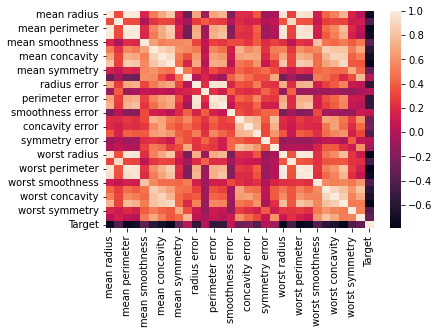

In [18]:
sns.heatmap(df.corr())

C:\Users\sudes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

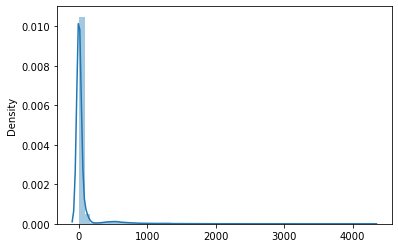

In [20]:
sns.distplot(df)

In [21]:
from scipy.stats import zscore 
z = zscore(df)
df_new = df[(z<3).all(axis=1)]

In [22]:
df_new.shape

(496, 31)

In [23]:
df.shape

(569, 31)

In [24]:
df = df_new

In [26]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,...,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,13.856567,18.901169,89.847238,621.722984,0.094989,0.094637,0.073995,0.043219,0.177564,0.061774,...,25.162863,103.870786,819.591734,0.130747,0.230877,0.240408,0.106410,0.283794,0.081445,0.671371
std,3.052143,3.970356,20.859539,287.298405,0.012950,0.041094,0.061721,0.032576,0.023250,0.005542,...,5.665128,28.355383,453.091872,0.021127,0.125728,0.171176,0.058341,0.049625,0.014405,0.470189
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,...,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.740000,16.010000,75.412500,423.425000,0.085218,0.062277,0.027115,0.019435,0.160575,0.057495,...,20.852500,84.402500,516.475000,0.115600,0.139775,0.106150,0.062960,0.248775,0.070825,0.000000
50%,13.210000,18.585000,85.555000,538.800000,0.094540,0.085300,0.052965,0.030690,0.177050,0.061145,...,25.135000,96.475000,666.750000,0.130050,0.202350,0.195150,0.092040,0.278600,0.078740,1.000000
75%,15.285000,21.465000,100.225000,717.325000,0.103700,0.120025,0.106875,0.062655,0.193000,0.065083,...,28.925000,117.700000,968.525000,0.143600,0.304825,0.348400,0.148925,0.311300,0.089835,1.000000
max,23.270000,30.720000,152.100000,1686.000000,0.137100,0.228400,0.317400,0.156200,0.254000,0.079760,...,41.610000,195.900000,2403.000000,0.190900,0.664300,0.848900,0.270100,0.475300,0.134100,1.000000


In [28]:
from scipy.stats import boxcox 
df['mean radius'] = boxcox(df['mean radius'], 0)

C:\Users\sudes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

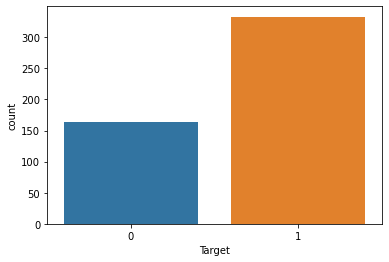

In [30]:
sns.countplot(df['Target'])

In [29]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
1,3.023834,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,2.980111,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
4,3.010128,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
5,2.521721,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440,0
6,2.904165,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,3.040706,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873,0
564,3.070840,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,3.002211,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,2.809403,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0


In [31]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25, random_state = 45) 

In [33]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\sudes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
lr.score(x_train, y_train)

0.956989247311828

The training score of the machine is 0.95 that is, 95%. 

In [35]:
pred = lr.predict(x_test)

In [37]:
print("The accuracy score: ", accuracy_score(y_test, pred))
print("The classification report is as follows: ", classification_report(y_test, pred))
print("Confusion matrix is as follows: ", confusion_matrix(y_test, pred))

The accuracy score:  0.9596774193548387
The classification report is as follows:                precision    recall  f1-score   support

           0       0.88      1.00      0.94        37
           1       1.00      0.94      0.97        87

    accuracy                           0.96       124
   macro avg       0.94      0.97      0.95       124
weighted avg       0.96      0.96      0.96       124

Confusion matrix is as follows:  [[37  0]
 [ 5 82]]


The testing score of the machine is 95.9% with normal datavalues. 
What with the standairzed values? 

# Standard Scaling 

In [39]:
st = StandardScaler()
x = st.fit_transform(x)

In [40]:
x

array([[ 1.95102049, -0.28519142,  2.0660201 , ...,  1.36558681,
        -0.17739531,  0.5263838 ],
       [ 1.74710228,  0.59218925,  1.92685462, ...,  2.34358535,
         1.56340498,  0.42631716],
       [ 1.88709936, -1.14996604,  2.17159391, ...,  0.96237689,
        -0.95601514, -0.32418261],
       ...,
       [ 1.85017578,  2.35703543,  1.98444034, ...,  0.96752425,
        -0.53644798, -1.04758101],
       [ 0.95093872,  2.31417488,  0.88551293, ...,  0.607209  ,
        -1.25051901, -0.22550579],
       [-2.59557509,  1.42166696, -2.01200834, ..., -1.82577684,
         0.06667982, -0.76822831]])

In [41]:
x = pd.DataFrame(data = x)

In [42]:
x

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.951020,-0.285191,2.066020,2.453853,-0.792238,-0.389686,0.209289,0.828185,0.156529,-0.921887,...,2.215682,-0.309725,1.939126,2.510651,-0.329131,-0.352518,0.006971,1.365587,-0.177395,0.526384
1,1.747102,0.592189,1.926855,2.025294,1.129430,1.589750,2.001407,2.602164,1.263003,-0.322172,...,1.872057,0.064872,1.716722,1.964957,0.646902,1.541567,1.228000,2.343585,1.563405,0.426317
2,1.887099,-1.149966,2.171594,2.352811,0.410543,0.929613,2.011138,1.876962,0.143613,-0.531711,...,1.622808,-1.500661,1.706131,1.668913,0.315240,-0.206023,0.933268,0.962377,-0.956015,-0.324183
3,-0.390778,-0.807082,-0.349221,-0.503898,2.536282,1.835779,1.359164,1.157598,1.340499,2.593313,...,-0.088058,-0.249648,-0.016620,-0.172306,2.290996,2.340921,1.725651,1.161408,2.313785,2.984965
4,1.392900,0.271996,1.427778,1.457367,-0.027745,0.349862,0.627720,0.945876,0.079033,-0.786409,...,1.705084,0.441236,1.741434,1.737401,0.637426,0.212762,0.806955,1.489123,0.453973,0.155303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,2.029709,1.560333,2.550700,2.527022,1.152620,3.141438,3.947599,3.201377,1.607431,1.267436,...,2.046289,0.750455,2.655763,2.207979,0.471595,1.494594,2.453122,2.535753,0.183675,1.201139
492,2.170251,0.879607,2.502712,2.986938,1.237649,0.517941,2.755557,2.940182,-0.213731,-1.001367,...,2.326997,0.218598,2.196833,2.667510,0.485809,-0.155864,0.995840,1.976407,-1.569229,-0.715415
493,1.850176,2.357035,1.984440,2.227379,0.217294,0.213450,1.135352,1.680604,-0.101792,-1.163941,...,1.901096,2.312454,1.804978,2.013562,-0.670269,-0.307933,0.474213,0.967524,-0.536448,-1.047581
494,0.950939,2.314175,0.885513,0.823588,-0.806925,0.186655,0.300273,0.301184,-0.799258,-0.956208,...,0.761325,1.582697,0.805923,0.672525,-0.798196,0.625177,0.584152,0.607209,-1.250519,-0.225506


In [43]:
x.mean()

0     6.191284e-15
1    -2.194929e-15
2    -3.169508e-15
3     7.699934e-17
4     6.869953e-15
5    -6.522560e-16
6    -3.585841e-16
7    -4.118569e-16
8    -4.587504e-15
9     5.040099e-15
10    6.016972e-16
11    1.734947e-15
12    2.959732e-16
13   -3.982030e-16
14   -2.220726e-15
15   -1.266908e-16
16    4.248394e-16
17   -6.231574e-16
18   -1.817543e-15
19    4.115212e-16
20    2.226266e-15
21    1.679884e-15
22   -6.218144e-16
23    6.012216e-16
24   -1.126339e-15
25   -2.464427e-15
26   -5.636173e-16
27   -1.817543e-16
28   -3.360579e-15
29   -1.830973e-16
dtype: float64

In [44]:
x.std()

0     1.00101
1     1.00101
2     1.00101
3     1.00101
4     1.00101
5     1.00101
6     1.00101
7     1.00101
8     1.00101
9     1.00101
10    1.00101
11    1.00101
12    1.00101
13    1.00101
14    1.00101
15    1.00101
16    1.00101
17    1.00101
18    1.00101
19    1.00101
20    1.00101
21    1.00101
22    1.00101
23    1.00101
24    1.00101
25    1.00101
26    1.00101
27    1.00101
28    1.00101
29    1.00101
dtype: float64

C:\Users\sudes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

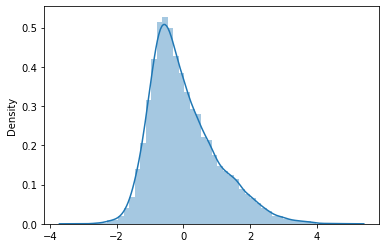

In [55]:
sns.distplot(x)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .25, random_state = 45)

In [46]:
lr.fit(x_train, y_train)

LogisticRegression()

In [47]:
print("The training score of the machine with standarized scale values is: ", lr.score(x_train, y_train))

The training score of the machine with standarized scale values is:  0.9865591397849462


In [48]:
lr_pred = lr.predict(x_test)

In [49]:
print("The accuracy score: ", accuracy_score(y_test, lr_pred))
print("The classification report is as follows: ", classification_report(y_test, lr_pred))
print("Confusion matrix is as follows: ", confusion_matrix(y_test, lr_pred))

The accuracy score:  0.9758064516129032
The classification report is as follows:                precision    recall  f1-score   support

           0       0.95      0.97      0.96        37
           1       0.99      0.98      0.98        87

    accuracy                           0.98       124
   macro avg       0.97      0.97      0.97       124
weighted avg       0.98      0.98      0.98       124

Confusion matrix is as follows:  [[36  1]
 [ 2 85]]


In [50]:
p = np.array([1.097063,-2.05896,1.356874,-3.1548963,2.4581236,-1.5678965,6.458965,-3.451289,3.56123789])

In [52]:
p.shape

(9,)

In [53]:
p.reshape(1,-1)

array([[ 1.097063  , -2.05896   ,  1.356874  , -3.1548963 ,  2.4581236 ,
        -1.5678965 ,  6.458965  , -3.451289  ,  3.56123789]])

In [54]:
lr_pred(p)

TypeError: 'numpy.ndarray' object is not callable